<a href="https://colab.research.google.com/github/namwootree/Study-in-UNIST/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EC%9D%84%20%ED%99%9C%EC%9A%A9%ED%95%9C%20%EA%B8%88%EC%9C%B5%EC%8B%9C%EC%9E%A5%20%EB%B6%84%EC%84%9D/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

* ### For firms in the following table, estimate stock returns using the Fama/French 5 factor model.

<div align="center">

|Global Players|Local Players|
|:--------------:|:-------------:|
|Samsung Electronics|Naver|
|LG Chem|Kakao|
|SK Hynix|KB Financial Group|
|POSCO Holdings|KT&G (Korea Tobacco)|
|Hyundai Motors|SK Telecom|

</div>

<br>

* ### Compare alphas and betas in global players versus local players.<br><br>
    - Idea: Fama/French factors are constructed based on U.S. stocks. Stock returns of global players may be highly correlated with factors based on U.S. firms while stock returns of local ones may not.<br><br>
    - Report coefficients and their significance.<br><br>
    - Add your economic interpretation.<br><br>

* ### Use monthly data for the sample period of 2003/01 – 2021/12
<br><br>

# Setting

## Install Library

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Load Lirbrary

In [3]:
import numpy as np
import pandas as pd

import yfinance as yf
import pandas_datareader.data as web
from pandas_datareader.famafrench import get_available_datasets

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Data Set

In [5]:
# Set Period
START_DATE = '2002-12-31'
END_DATE = '2021-12-31'

In [116]:
def road_adj_close_mounth(code, start, end, progress):

  df = yf.download(code,
                   start,
                   end,
                   progress=False)

  df = df['Adj Close'].resample('M') \
                      .last() \
                      .pct_change() \
                      .dropna()

  df.index = df.index.strftime('%Y-%m')

  df = pd.DataFrame(df)

  return df

### Global Players

In [117]:
Samsung_Electornics = road_adj_close_mounth('005930.KS',
                                            start=START_DATE,
                                            end=END_DATE,
                                            progress=False)

LG_Chem = road_adj_close_mounth('051910.KS',
                                start=START_DATE,
                                end=END_DATE,
                                progress=False)

SK_Hynix = road_adj_close_mounth('000660.KS',
                                  start=START_DATE,
                                  end=END_DATE,
                                  progress=False)

POSCO_Holdings = road_adj_close_mounth('005490.KS',
                                        start=START_DATE,
                                        end=END_DATE,
                                        progress=False)

Hyundai_Motors = road_adj_close_mounth('005380.KS',
                                        start=START_DATE,
                                        end=END_DATE,
                                        progress=False)

In [118]:
Global_Players = pd.concat([Samsung_Electornics,
                            LG_Chem,
                            SK_Hynix,
                            POSCO_Holdings,
                            Hyundai_Motors],
                           axis=1)

Global_Players.columns = ['Samsung_Electornics',
                          'LG_Chem',
                          'SK_Hynix',
                          'POSCO_Holdings',
                          'Hyundai_Motors']

Global_Players.head()

,Samsung_Electornics,LG_Chem,SK_Hynix,POSCO_Holdings,Hyundai_Motors
Date,,,,,
2003-01,-0.071656,0.059113,-0.160714,0.008475,-0.109910
2003-02,-0.041166,-0.139535,-0.148936,-0.071429,0.016195
2003-03,0.016100,0.040541,-0.325000,-0.108598,-0.043825
2003-04,0.073944,0.046753,0.139330,0.040609,0.195833
2003-05,0.062295,0.114144,0.181115,0.048781,0.003484


### Local Players




In [119]:
Naver = road_adj_close_mounth('035420.KS',
                              start=START_DATE,
                              end=END_DATE,
                              progress=False)

Kakao = road_adj_close_mounth('035720.KS',
                              start=START_DATE,
                              end=END_DATE,
                              progress=False)

KB_Financial_Group = road_adj_close_mounth('105560.KS',
                                            start=START_DATE,
                                            end=END_DATE,
                                            progress=False)

KT_G = road_adj_close_mounth('033780.KS',
                              start=START_DATE,
                              end=END_DATE,
                              progress=False)

SK_Telecom = road_adj_close_mounth('017670.KS',
                                    start=START_DATE,
                                    end=END_DATE,
                                    progress=False)

In [120]:
Local_Players = pd.concat([Naver,
                           Kakao,
                           KB_Financial_Group,
                           KT_G,
                           SK_Telecom],
                           axis=1)

Local_Players.columns = ['Naver',
                         'Kakao',
                         'KB_Financial_Group',
                         'KT_G',
                         'SK_Telecom']

Local_Players.head()

,Naver,Kakao,KB_Financial_Group,KT_G,SK_Telecom
Date,,,,,
2003-01,0.155056,0.196825,-0.047619,0.006098,-0.218340
2003-02,0.087549,0.021220,0.000000,0.015152,-0.078212
2003-03,0.144902,0.010390,0.000000,0.086567,-0.072727
2003-04,0.703124,0.272493,0.000000,0.021978,0.104575
2003-05,0.192661,0.298990,-0.183750,0.072581,0.124260


### Market (KOSPI • S&P 500)

In [150]:
KOSPI = road_adj_close_mounth('^KS11',
                              start=START_DATE,
                              end=END_DATE,
                              progress=False)
KOSPI.columns = ['KOSPI']
KOSPI.head()

,KOSPI
Date,
2003-02,-0.027760
2003-03,-0.069044
2003-04,0.118816
2003-05,0.056845
2003-06,0.057639


In [151]:
S_P_500 = road_adj_close_mounth('^GSPC',
                              start=START_DATE,
                              end=END_DATE,
                              progress=False)
S_P_500.columns = ['S_&_P_500']
S_P_500.head()

,S_&_P_500
Date,
2003-01,-0.027415
2003-02,-0.017004
2003-03,0.008358
2003-04,0.081044
2003-05,0.050899


In [154]:
market = pd.concat([KOSPI, S_P_500], axis=1)
market.head()

,KOSPI,S_&_P_500
Date,,
2003-02,-0.027760,-0.017004
2003-03,-0.069044,0.008358
2003-04,0.118816,0.081044
2003-05,0.056845,0.050899
2003-06,0.057639,0.011322


# EDA

In [169]:
def monthly_adj_close(df, players):

  plt.figure(figsize=(20,5))

  sns.lineplot(data=df)

  plt.title(f'Monthly Adj Close of {players} (Y : 2001 ~ 2021)')

  plt.xlabel('YYYY-MM', fontsize=10)
  plt.ylabel('Adj Close', fontsize=10)
  plt.ylim(-0.5, 0.5)
  plt.xticks(np.arange(0, len(df.index)+1, 7),
            fontsize=5,
            rotation=45)

  plt.show()

  for player in df.columns:

    player_market = pd.concat([df[[player]], market])

    plt.figure(figsize=(20,5))

    sns.lineplot(data=player_market)

    plt.title(f'Monthly Adj Close of {player} (Y : 2001 ~ 2021)')
    plt.xlabel('YYYY-MM', fontsize=10)
    plt.ylabel('Adj Close', fontsize=10)
    plt.ylim(-0.5, 0.5)
    plt.xticks(np.arange(0, len(df.index)+1, 7),
              fontsize=5,
              rotation=45)
    
    plt.show()


## Global Players

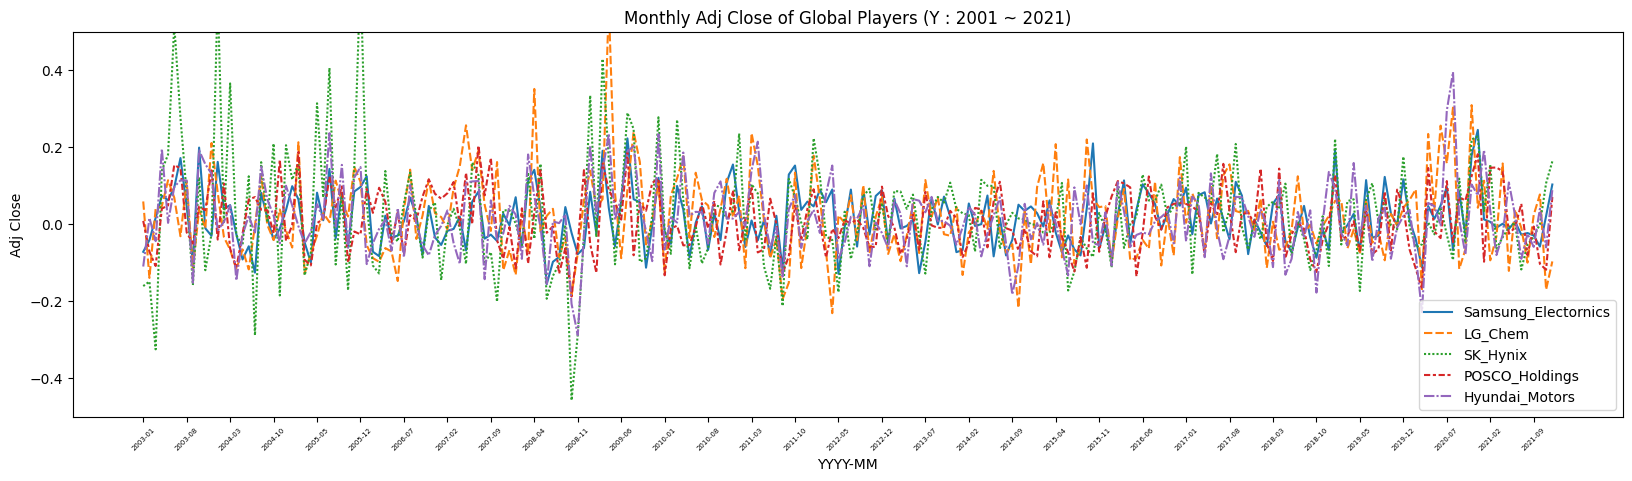

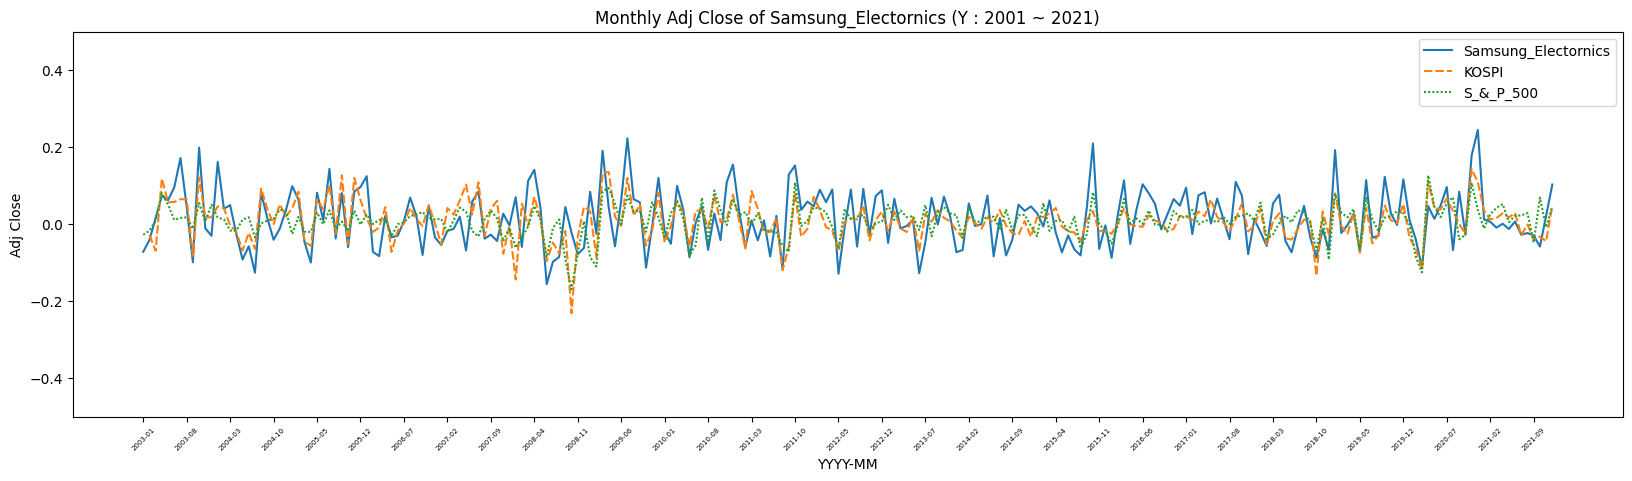

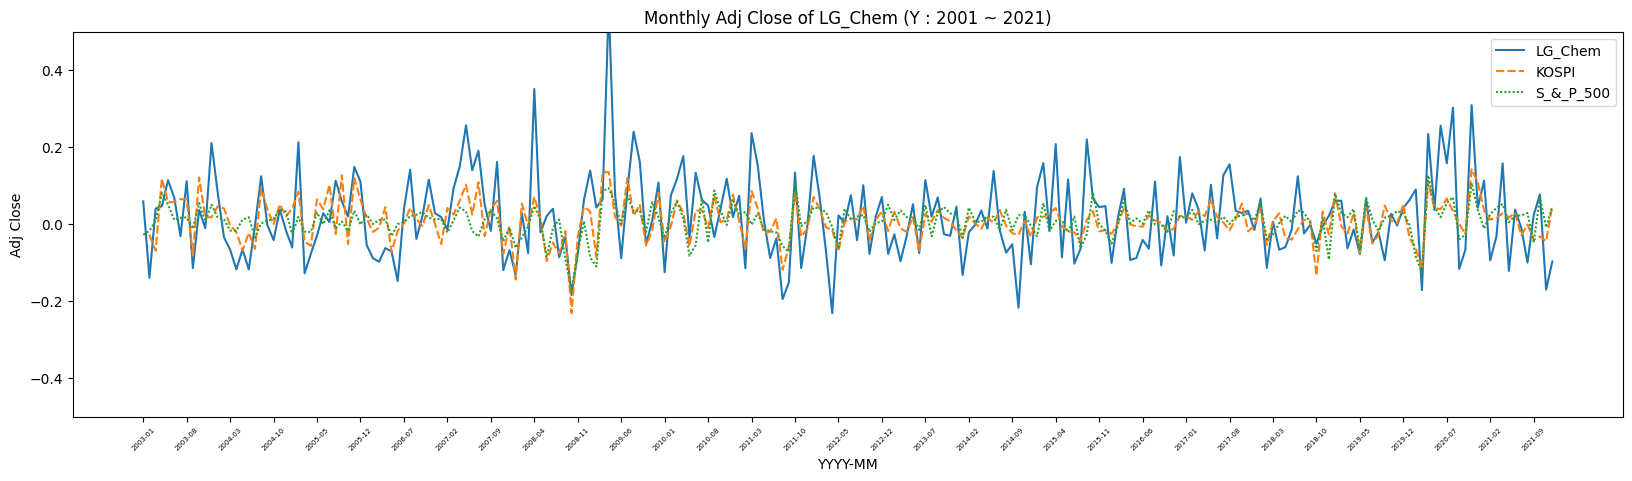

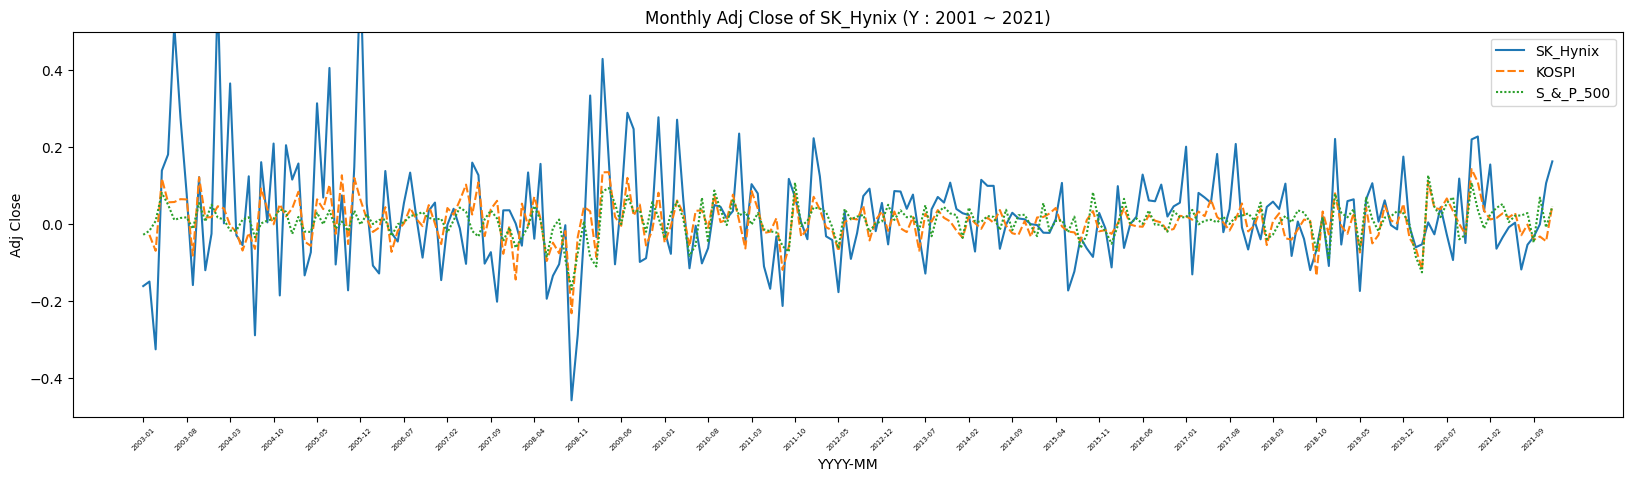

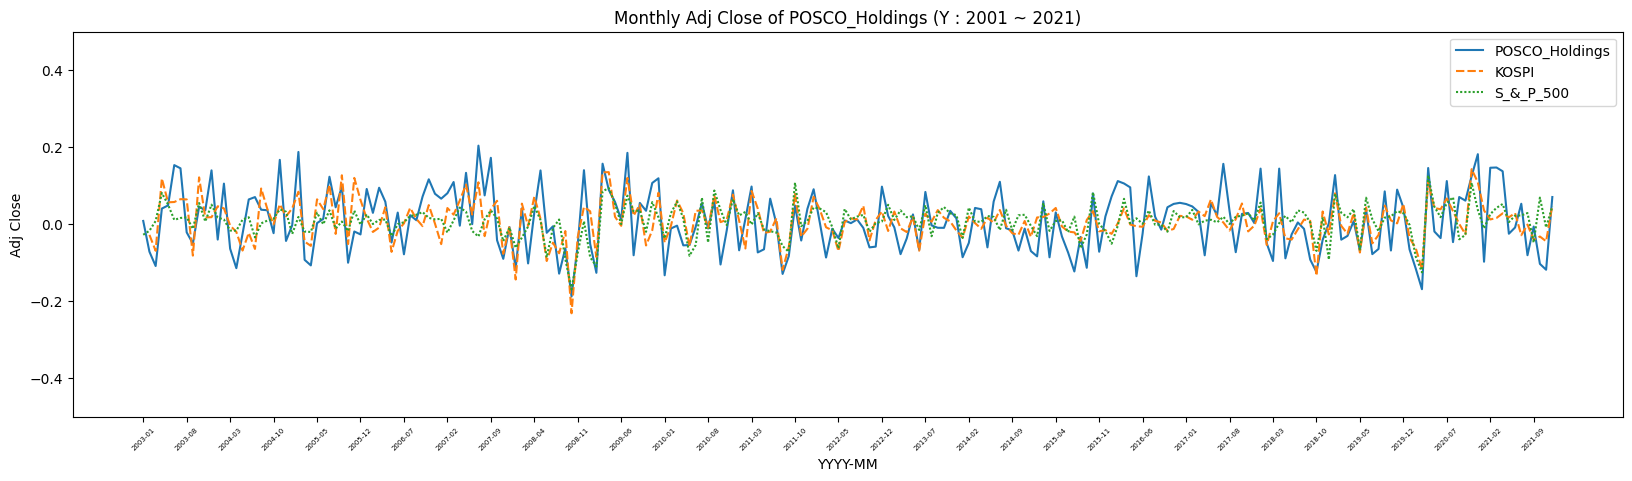

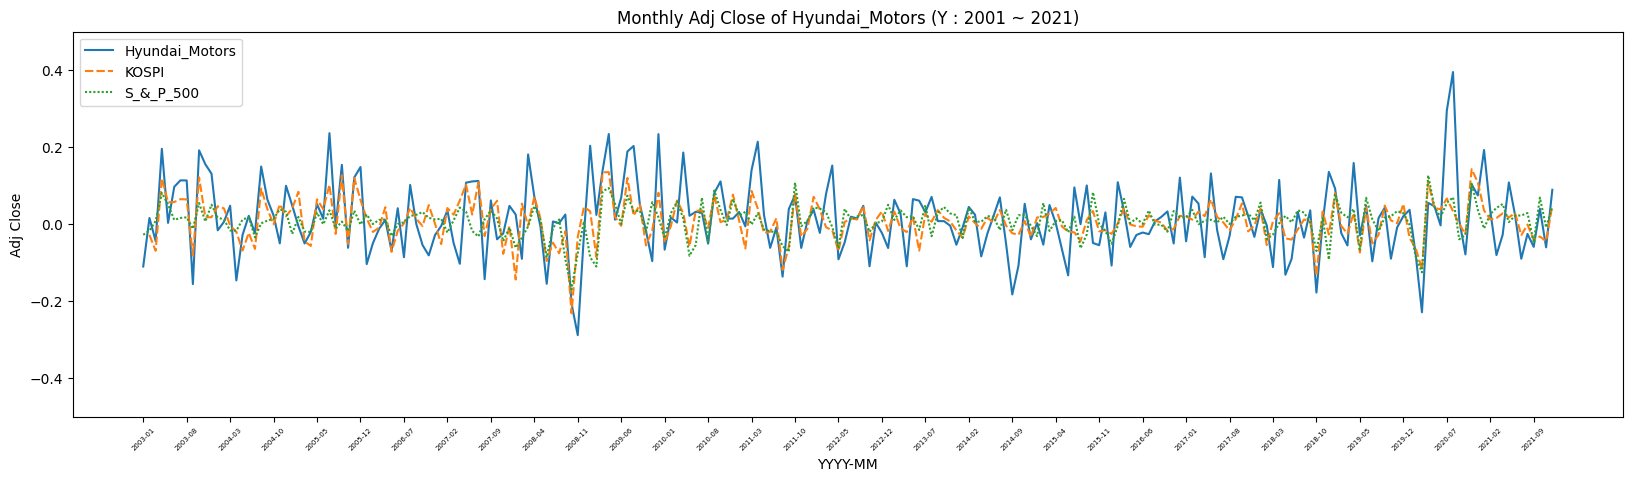

In [170]:
monthly_adj_close(Global_Players, 'Global Players')

## Local Players

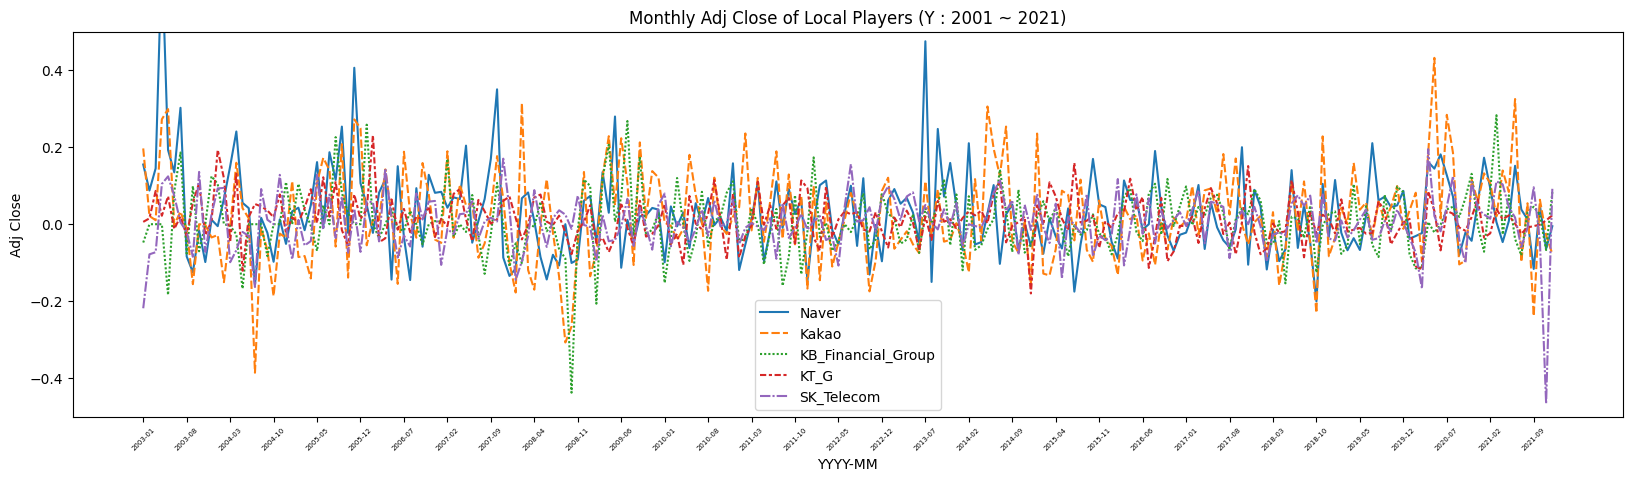

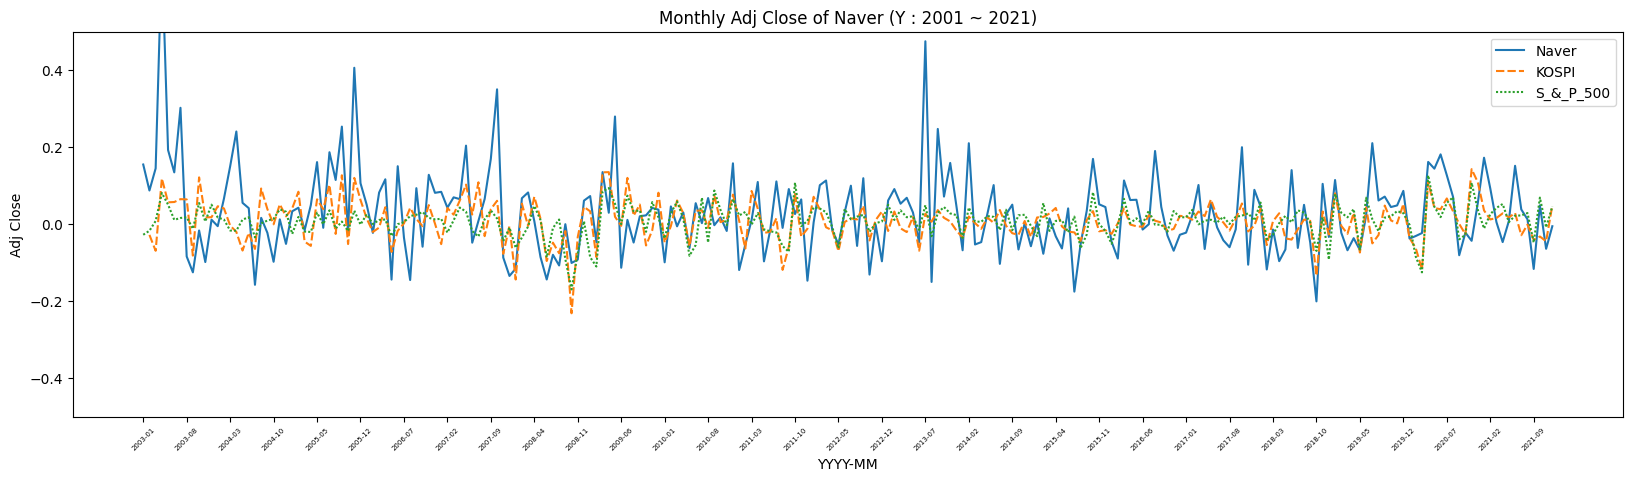

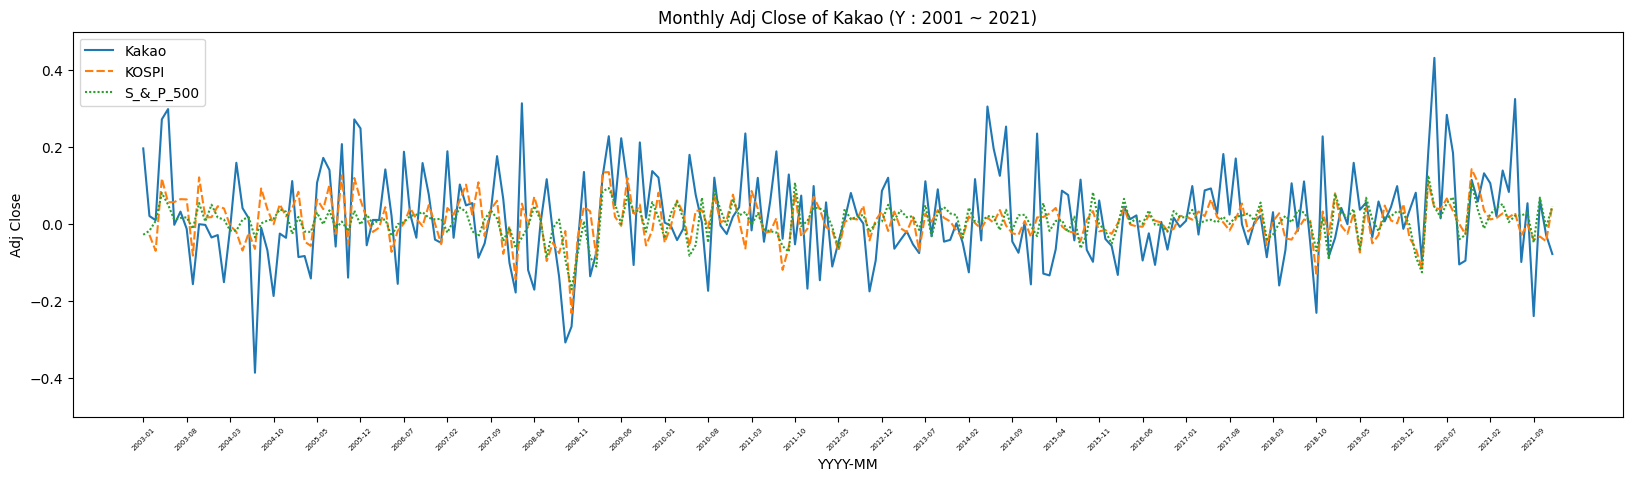

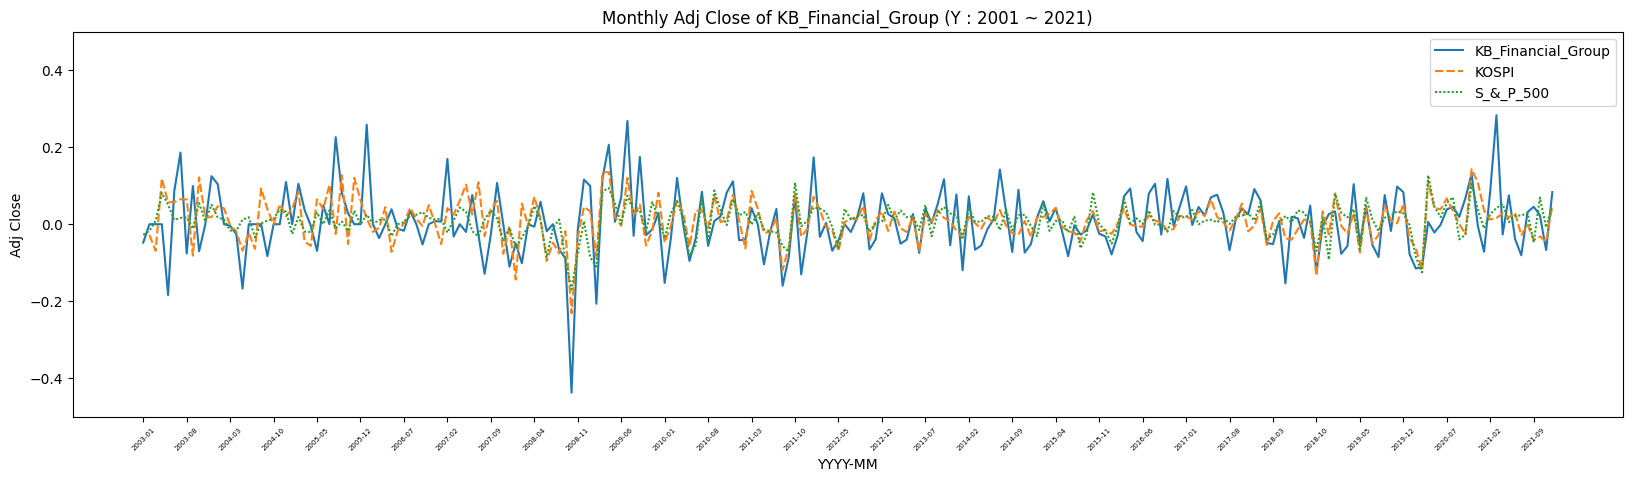

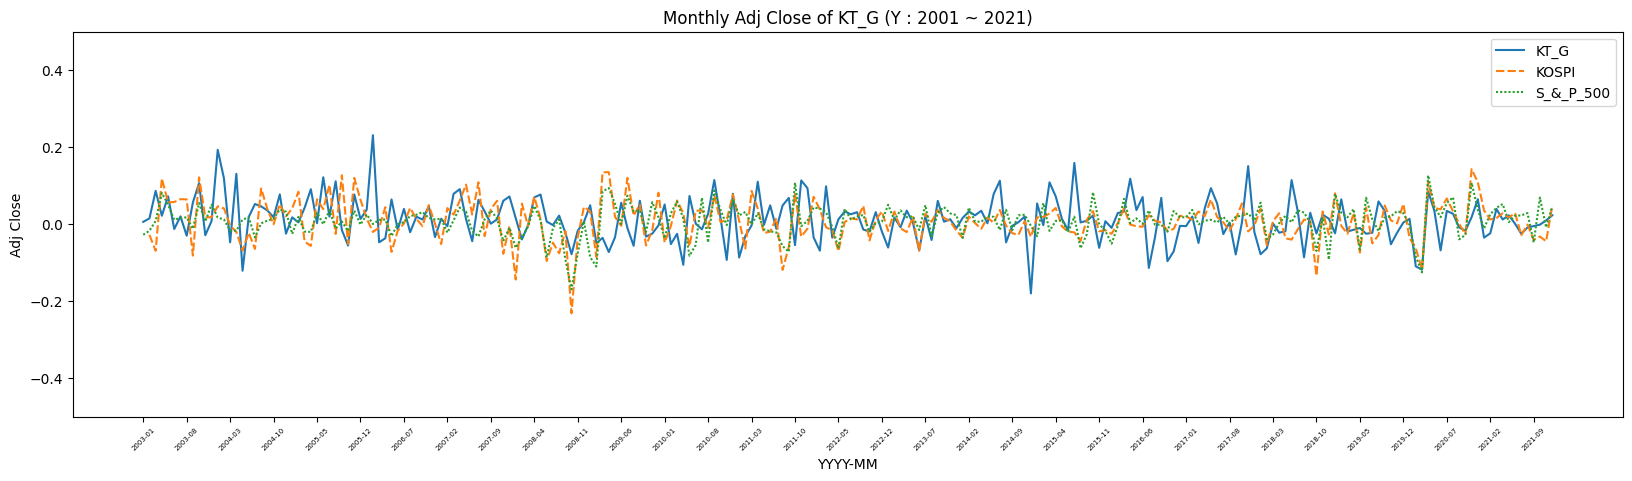

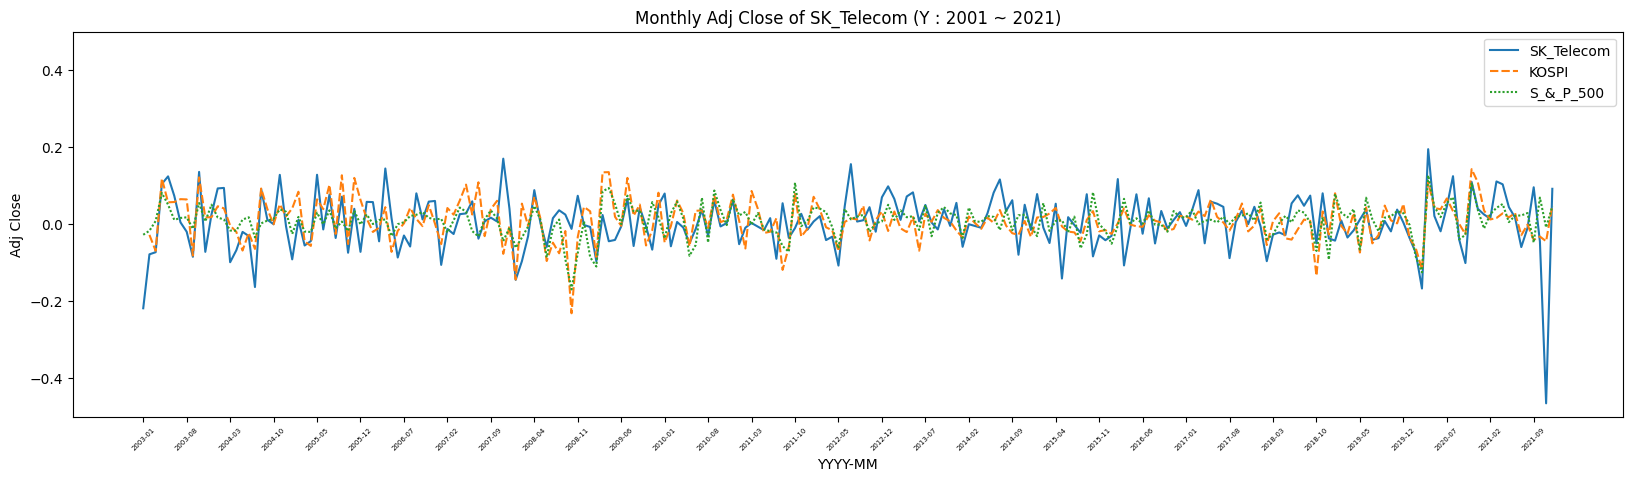

In [171]:
monthly_adj_close(Local_Players, 'Local Players')

# Fama-French 5 Factor Model

In [181]:
five_factor = web.DataReader('F-F_Research_Data_5_Factors_2x3', 
                             'famafrench', 
                             start=START_DATE,
                             end=END_DATE)[0]

five_factor = five_factor/100

In [182]:
five_factor = five_factor.iloc[1:]
five_factor.index = Global_Players.index

In [183]:
five_factor.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2003-01,-0.0257,0.0072,-0.0081,-0.0100,0.0071,0.0010
2003-02,-0.0188,-0.0093,-0.0138,0.0083,-0.0061,0.0009
2003-03,0.0109,0.0067,-0.0191,0.0185,-0.0075,0.0010
2003-04,0.0822,0.0104,0.0117,-0.0470,0.0109,0.0010
2003-05,0.0605,0.0487,0.0050,-0.0706,0.0299,0.0009


# Merge Players & Fama-French

In [184]:
def merge_players_fama_french(players, ff):

  player_ff = pd.merge(players, ff,
                       how='inner',
                       left_index=True,
                       right_index=True)
  
  for i in range(0, len(players.columns)):
    colnm = player_ff.columns[i]
    new_colnm = colnm.strip() + '_RF'
    player_ff[new_colnm] = player_ff[colnm] - player_ff['RF']

  player_ff.rename(columns={'Mkt-RF':'MKT_RF'}, inplace=True)

  return player_ff

In [185]:
Global_FF5 = merge_players_fama_french(Global_Players, five_factor)
print(Global_FF5.columns)

Index(['Samsung_Electornics', 'LG_Chem', 'SK_Hynix', 'POSCO_Holdings',
       'Hyundai_Motors', 'MKT_RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF',
       'Samsung_Electornics_RF', 'LG_Chem_RF', 'SK_Hynix_RF',
       'POSCO_Holdings_RF', 'Hyundai_Motors_RF'],
      dtype='object')


In [186]:
Local_FF5 = merge_players_fama_french(Local_Players, five_factor)
print(Local_FF5.columns)

Index(['Naver', 'Kakao', 'KB_Financial_Group', 'KT_G', 'SK_Telecom', 'MKT_RF',
       'SMB', 'HML', 'RMW', 'CMA', 'RF', 'Naver_RF', 'Kakao_RF',
       'KB_Financial_Group_RF', 'KT_G_RF', 'SK_Telecom_RF'],
      dtype='object')


# Multiple Regression with OLS

In [215]:
def M_regression_OLS(list_players, ff5_players):

  # params
  alpha = [0]*5
  MKT_RF = [0]*5
  SMB = [0]*5
  HML = [0]*5
  RMW = [0]*5
  CMA = [0]*5

  # t-statistics
  alpha_tval = [0]*5
  MKT_RF_tval = [0]*5
  SMB_tval = [0]*5
  HML_tval = [0]*5
  RMW_tval = [0]*5
  CMA_tval = [0]*5

  for i, player in enumerate(list_players):

    model = sm.formula.ols(formula = f'{player} ~ MKT_RF + SMB + HML + RMW + CMA',
                          data = ff5_players)\
                          .fit()

    alpha[i] = model.params[0]
    MKT_RF[i] = model.params[1]
    SMB[i] = model.params[2]
    HML[i] = model.params[3]
    RMW[i] = model.params[4]
    CMA[i] = model.params[-1]

    alpha_tval[i] = model.tvalues[0]
    MKT_RF_tval[i] = model.tvalues[1]
    SMB_tval[i] = model.tvalues[2]
    HML_tval[i] = model.tvalues[3]
    RMW_tval[i] = model.tvalues[4]
    CMA_tval[i] = model.tvalues[-1]

    print(f'\n{player}\n')                       
    print(model.summary())
    print('\n'+'*'*100+'\n')  

  print('Average alpha of Players is {:.2f}%'.format(np.mean(alpha)))
  print('Average alpha t-statistics of Players is {:.2f}'.format(np.mean(alpha_tval)))

  dict_OLS = {
      'alpha':alpha,
      'alpha_t_val':alpha_tval,
      'MRK_RF':MKT_RF,
      'MRK_RF_t_val':MKT_RF_tval,
      'SMB':SMB,
      'SMB_t_val':SMB_tval,
      'HML':HML,
      'HML_t_val':HML_tval,
      'RMW':RMW,
      'RMW_t_val':RMW_tval,
      'CMA':CMA,
      'CMA_t_val':CMA_tval,
  }

  df_OLS = pd.DataFrame(dict_OLS)
  df_OLS.index = list_players

  return df_OLS

## Global Players

In [217]:
list_global = list(Global_Players.columns)
Global_OLS = M_regression_OLS(list_global, Global_FF5)


Samsung_Electornics

                             OLS Regression Results                            
Dep. Variable:     Samsung_Electornics   R-squared:                       0.203
Model:                             OLS   Adj. R-squared:                  0.185
Method:                  Least Squares   F-statistic:                     11.28
Date:                 Fri, 07 Apr 2023   Prob (F-statistic):           1.04e-09
Time:                         05:34:31   Log-Likelihood:                 296.19
No. Observations:                  228   AIC:                            -580.4
Df Residuals:                      222   BIC:                            -559.8
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.008

In [218]:
Global_OLS

,alpha,alpha_t_val,MRK_RF,MRK_RF_t_val,SMB,SMB_t_val,HML,HML_t_val,RMW,RMW_t_val,CMA,CMA_t_val
Samsung_Electornics,0.008737,1.866114,0.628833,5.260718,0.338227,1.586403,-0.083922,-0.434159,-0.198446,-0.761435,0.687898,2.057235
LG_Chem,0.009361,1.332594,1.040653,5.802364,0.077527,0.242353,-0.180679,-0.622977,-0.014496,-0.037071,-0.515076,-1.026644
SK_Hynix,0.021705,2.397985,0.685056,2.964511,0.677479,1.643685,0.098016,0.262295,-1.524951,-3.026652,0.364270,0.563508
POSCO_Holdings,0.001555,0.314477,0.808974,6.407822,0.077237,0.343004,0.483633,2.368959,0.182729,0.663839,-0.506016,-1.432816
Hyundai_Motors,0.007793,1.269434,0.711337,4.538634,0.317547,1.135937,0.094774,0.373943,-0.017141,-0.050161,-0.159192,-0.363097


## Local Players

In [219]:
list_Local = list(Local_Players.columns)
Local_OLS = M_regression_OLS(list_Local, Local_FF5)


Naver

                            OLS Regression Results                            
Dep. Variable:                  Naver   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     8.572
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           1.93e-07
Time:                        05:35:39   Log-Likelihood:                 195.29
No. Observations:                 228   AIC:                            -378.6
Df Residuals:                     222   BIC:                            -358.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0235      0.007      3.220 

In [220]:
Local_OLS

,alpha,alpha_t_val,MRK_RF,MRK_RF_t_val,SMB,SMB_t_val,HML,HML_t_val,RMW,RMW_t_val,CMA,CMA_t_val
Naver,0.023465,3.219663,0.913802,4.911015,-0.238589,-0.718895,-0.349790,-1.162498,-0.941230,-2.320038,-0.548754,-1.054259
Kakao,0.011095,1.401978,0.896512,4.437269,0.509931,1.415033,-0.790277,-2.418824,-0.237957,-0.540179,-0.709297,-1.254983
KB_Financial_Group,-0.000845,-0.164304,0.777358,5.917872,0.067053,0.286191,0.605026,2.848290,0.207409,0.724188,-0.187885,-0.511313
KT_G,0.009645,2.417598,0.179669,1.763934,-0.139261,-0.766536,-0.161508,-0.980546,0.314604,1.416617,0.154070,0.540724
SK_Telecom,0.000464,0.098006,0.558048,4.619002,-0.163296,-0.757786,0.041166,0.210706,-0.294871,-1.119409,0.366965,1.085803
